In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [2]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male   NaN      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male   NaN      0      0   
417                      Peter, Master. Michael J    male   NaN      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [3]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


La columna de Name la eliminaré para entrenar el modelo ya que no es relevante. La columna cabin tambien ya que tiene demasiados valores nulos. Age tiene algunos valores nulos, pero segun mi criterio no los suficientes como para eliminar la columna, haré una imputación con la mediana de la columna. A Fare tambien le haré una imputación del único valor que le falta. Las otras columnas estan bien en cuanto a valores nulos. 

In [8]:
df.shape

(418, 12)

In [27]:
cat_cols = df.select_dtypes(exclude=['int64', 'float64'])
for i in cat_cols.columns:
    print(df[i].value_counts())

Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64
Sex
male      266
female    152
Name: count, dtype: int64
Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64
Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64
Embarked
S    270
C    102
Q     46
Name: count, dtype: int6

aqui se puede ver que columnas como 'Name', 'Ticket' y 'Cabin' tienen muchos valores unicos. 'Name' la eliminaré por falta de relevancia y las otras dos las comprobaré con el coeficiente de correlación de Pearson 

/tmp/ipykernel_36/880452980.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # fondo con cuadrícula suave
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


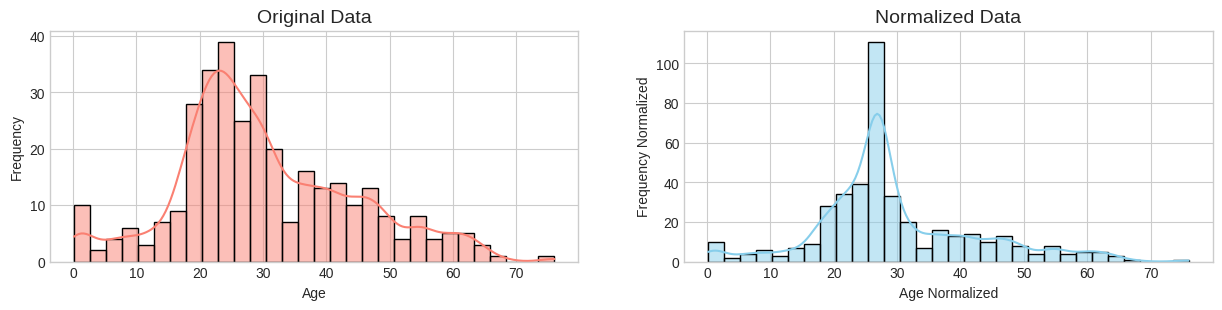

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


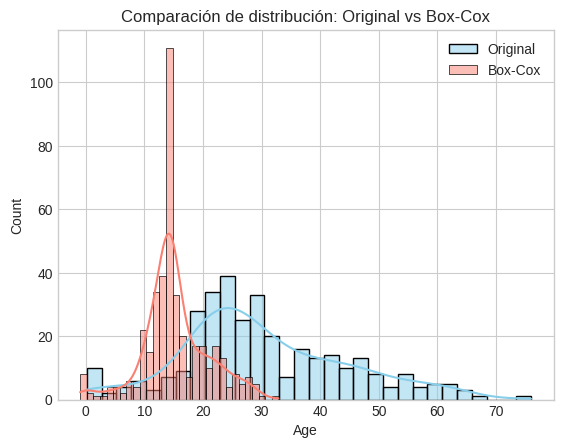

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
age_data = df[['Age']]
data_imputed = imputer.fit_transform(age_data)

data_1d = data_imputed.flatten()
#data_1d = data_imputed.reshape(-1) + 1e-6

normalized_data, lam = stats.boxcox(data_1d)

plt.style.use('seaborn-whitegrid')  # fondo con cuadrícula suave
fig.tight_layout(pad=3)             # espaciado entre subplots

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(data=df['Age'], ax=ax[0], bins=30,
             kde_kws={'bw_adjust':0.5},
             kde=True, legend=False, color='salmon').set_title('Original Data', fontsize=14)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
sns.histplot(data=data_1d, ax=ax[1], kde=True, bins=30,
             kde_kws={'bw_adjust':0.5},
            legend=False, color='skyblue').set_title('Normalized Data', fontsize=14)
ax[1].set_xlabel('Age Normalized')
ax[1].set_ylabel('Frequency Normalized')
plt.show()

sns.histplot(df['Age'], bins=30, color='skyblue', label='Original', kde=True)
sns.histplot(normalized_data, bins=30, color='salmon', label='Box-Cox', kde=True)
plt.legend()
plt.title('Comparación de distribución: Original vs Box-Cox')
plt.show()


Aqui podemos ver uns distribución de edad muy concentrada entre los 18 y 31 años

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


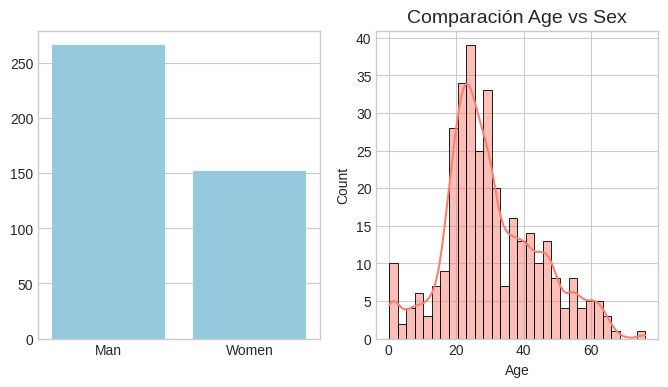

In [119]:
sex_counts = df['Sex'].value_counts()
man, women = sex_counts.values
man = pd.DataFrame({'Man': man}, index=[0])
women = pd.DataFrame({'Women': women}, index=[0])
sex_counts = man.join(women)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data=sex_counts, color='skyblue', ax=ax[0])
sns.histplot(data=df['Age'], bins=30, ax=ax[1],
             kde_kws={'bw_adjust':0.5},
             kde=True, legend=False, color='salmon').set_title('Comparación Age vs Sex', fontsize=14)
plt.show()


/tmp/ipykernel_36/2775003321.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')  # fondo con cuadrícula suave
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


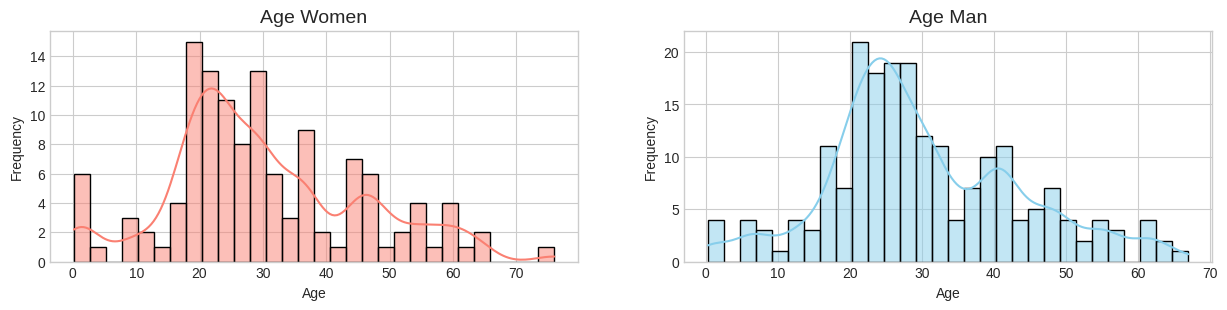

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


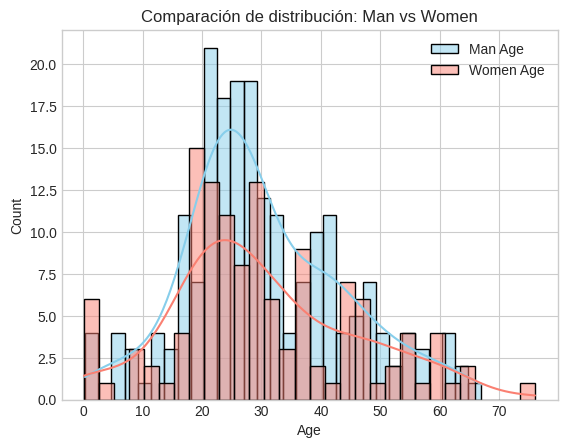

In [130]:
df_age_w = df[['Age', 'Sex']]
df_age_m = df[['Age', 'Sex']]

df_age_w = df_age_w.loc[df['Sex']=='female', 'Age']
df_age_m = df_age_m.loc[df['Sex']=='male', 'Age']

plt.style.use('seaborn-whitegrid')  # fondo con cuadrícula suave
fig.tight_layout(pad=3)             # espaciado entre subplots

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df_age_w, ax=ax[0], bins=30,
             kde_kws={'bw_adjust':0.5},
             kde=True, legend=False, color='salmon').set_title('Age Women', fontsize=14)
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
sns.histplot(df_age_m, ax=ax[1], kde=True, bins=30,
             kde_kws={'bw_adjust':0.5},
            legend=False, color='skyblue').set_title('Age Man', fontsize=14)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')
plt.show()

sns.histplot(df_age_m, bins=30, color='skyblue', label='Man Age', kde=True)
sns.histplot(df_age_w, bins=30, color='salmon', label='Women Age', kde=True)
plt.legend()
plt.title('Comparación de distribución: Man vs Women')
plt.show()

In [37]:
cat_cols_corr = df[['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket', 'Survived']].columns
cat_cols_corr

Index(['Name', 'Sex', 'Cabin', 'Embarked', 'Ticket', 'Survived'], dtype='object')

In [38]:
from scipy.stats import chi2_contingency


for i in cat_cols_corr:
    for j in cat_cols_corr:
        if i != j:  # Aquí comparamos strings, no Series
            tabla = pd.crosstab(df[i], df[j])
            chi2, p, dof, _ = chi2_contingency(tabla)
            print(f"{i} vs {j}: chi2 = {chi2:.2f}, p-value = {p:.4f}")



Name vs Sex: chi2 = 418.00, p-value = 0.4770
Name vs Cabin: chi2 = 6825.00, p-value = 0.2582
Name vs Embarked: chi2 = 836.00, p-value = 0.4740
Name vs Ticket: chi2 = 151316.00, p-value = 0.2548
Name vs Survived: chi2 = 418.00, p-value = 0.4770
Sex vs Name: chi2 = 418.00, p-value = 0.4770
Sex vs Cabin: chi2 = 72.31, p-value = 0.5665
Sex vs Embarked: chi2 = 6.99, p-value = 0.0304
Sex vs Ticket: chi2 = 351.59, p-value = 0.6427
Sex vs Survived: chi2 = 413.69, p-value = 0.0000
Cabin vs Name: chi2 = 6825.00, p-value = 0.2582
Cabin vs Sex: chi2 = 72.31, p-value = 0.5665
Cabin vs Embarked: chi2 = 135.57, p-value = 0.7946
Cabin vs Ticket: chi2 = 6119.75, p-value = 0.0000
Cabin vs Survived: chi2 = 72.31, p-value = 0.5665
Embarked vs Name: chi2 = 836.00, p-value = 0.4740
Embarked vs Sex: chi2 = 6.99, p-value = 0.0304
Embarked vs Cabin: chi2 = 135.57, p-value = 0.7946
Embarked vs Ticket: chi2 = 836.00, p-value = 0.0024
Embarked vs Survived: chi2 = 6.99, p-value = 0.0304
Ticket vs Name: chi2 = 1513

Si miramos los p-values vemos que tanto 'Cabin', como 'Name', como 'Ticket' son altisimos asi que no son buenos predictores. En cambio 'Sex' es un gran predictor y 'Embarked' lo consideraremos para nuestro modelo.

<Axes: >

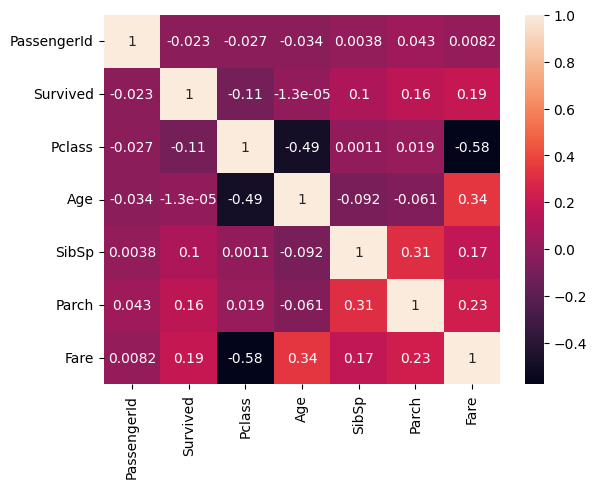

In [42]:
import seaborn as sns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_num_corr = df[num_cols].corr()

sns.heatmap(df_num_corr, annot=True)

In [43]:
print(df_num_corr)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023245 -0.026751 -0.034102  0.003818  0.043080   
Survived       -0.023245  1.000000 -0.108615 -0.000013  0.099943  0.159120   
Pclass         -0.026751 -0.108615  1.000000 -0.492143  0.001087  0.018721   
Age            -0.034102 -0.000013 -0.492143  1.000000 -0.091587 -0.061249   
SibSp           0.003818  0.099943  0.001087 -0.091587  1.000000  0.306895   
Parch           0.043080  0.159120  0.018721 -0.061249  0.306895  1.000000   
Fare            0.008211  0.191514 -0.577147  0.337932  0.171539  0.230046   

                 Fare  
PassengerId  0.008211  
Survived     0.191514  
Pclass      -0.577147  
Age          0.337932  
SibSp        0.171539  
Parch        0.230046  
Fare         1.000000  


Aqui se observan correlaciones muy bajas, nos quedaremos con todas y más adelante las volveré a analizar.

In [60]:
num_cols_model = df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].columns
cat_cols_model = df[['Sex', 'Embarked']].columns
cols_model = list(num_cols_model) + list(cat_cols_model)
df_model = df[cols_model]
X = df_model
y = df['Survived']

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score, RocCurveDisplay, PrecisionRecallDisplay, mean_absolute_error, accuracy_score, mean_squared_error 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, num_cols_model),
        ('categorical', categorical_transformer, cat_cols_model)
    ]
)

my_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid={
    'model__n_estimators':[100, 150 ,200],
    'model__max_depth':[5, 10, 20],
    'model__min_samples_leaf':[1, 2, 5],
    'model__min_samples_split':[10, 20, 30]
}

scoring = ['accuracy', 
           'f1', 
           'precision',
          'recall']

grid_search = GridSearchCV(my_pipeline,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='f1',
                           cv=5,
                           n_jobs=-1
                          )
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, train_size=0.8, shuffle=True
)

grid_search.fit(X_train, y_train)

print('Mejores parametros', grid_search.best_params_)
print('Mejor score R2', grid_search.best_score_)

best_model = grid_search.best_estimator_
preds_valid = best_model.predict(X_valid)

print(f'F1 score:', f1_score(y_valid, preds_valid, average='weighted'))






Mejores parametros {'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 10, 'model__n_estimators': 100}
Mejor score R2 1.0
F1 score: 1.0


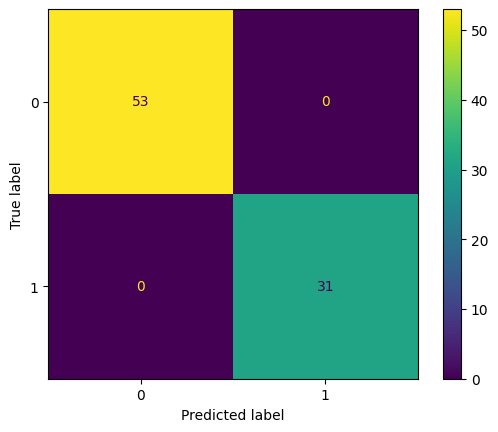

In [71]:
ConfusionMatrixDisplay.from_estimator(best_model,
                                     X_valid,
                                     y_valid,
                                     values_format='d')

In [75]:
print(f'Precision', precision_score(y_valid, preds_valid, pos_label=1))
print('Recall', recall_score(y_valid, preds_valid, pos_label=1))
print('F1 Score:', f1_score(y_valid, preds_valid, pos_label=1))

Precision 1.0
Recall 1.0
F1 Score: 1.0


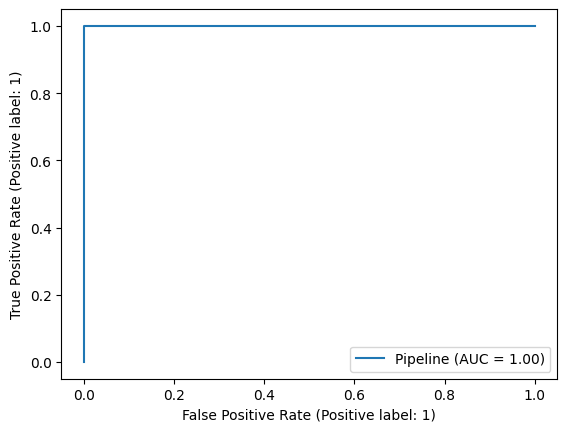

In [76]:
RocCurveDisplay.from_estimator(best_model, X_valid,
                              y_valid)

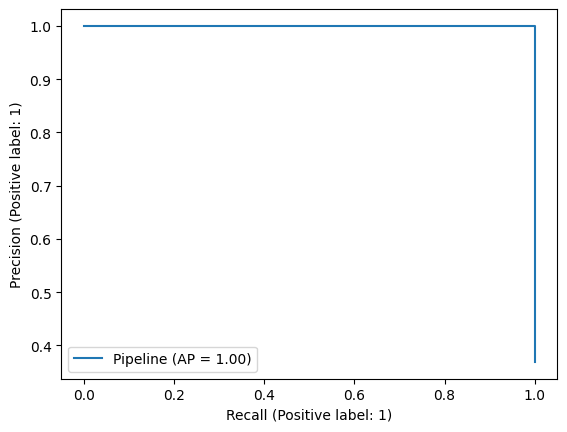

In [77]:
PrecisionRecallDisplay.from_estimator(best_model,
                                     X_valid,
                                     y_valid)

Lo que podemos ver en las ultimas operaciones es un grid search para encontrar los mejores hiperparametros para nuestro modelo RandomForestClassifier y despues calculamos unas metricas para evaluar la eficacia de nuestro modelo.
Podemos ver que el modelo predice el 100% de los casos, lo cual podria ser de extrañar en caso de haver hecho overfitting o leakage, pero en principio puedo asegurar que no ya que no se ha entrenado el modelo viendo la validation data y tampoco hay características que vayan a predecir 100% el resultado ('Survived') como podria ser si la persona respira o ha muerto.